<a href="https://colab.research.google.com/github/sitthatkaja/ThesisM.Sc./blob/main/OpenFace_2_0_Landmark_for_AI_Parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OpenFace 2.0 Landmark for AI Parkinson

ขั้นตอนทั้งหมดประกอบด้วย
1. เชื่อมกับ Google Drive
2. แก้ไข Path หรือเส้นทาง Input และ Output
3. เรียกใช้ OpenFace 2.0 ทั้งหมด (ไม่ต้องมีการแก้ไข)
4. เริ่มทำการประมวลผล (ไม่ต้องมีการแก้ไข)

หมายเหตุ : ก่อนเริ่มขั้นตอนที่ 1 ต้องทำการเตรียม video ไว้ใน Drive ให้เรียบร้อย เนื่องจาก หากรัน Drive แล้วจะไม่นับข้อมูลที่เข้ามาใหม่

----

1. เชื่อมกับ Google Drive (ไม่ต้องมีการแก้ไข รันตามลำดับ)

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import os
import glob
import shutil

---

2. แก้ไข Path หรือเส้นทาง Input และ Output (แก้ไขเพียง Path หลังจากแก้ไขเสร็จแล้ว รันตามลำดับ)

ตัวอย่างชื่อ path ใน Google Drive
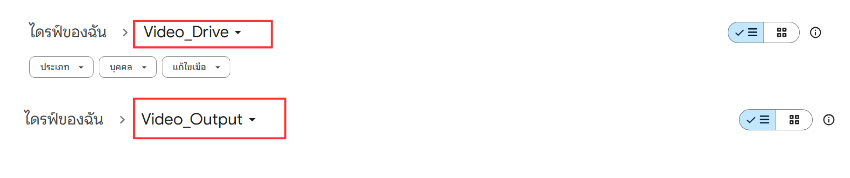

In [44]:
input_dir = "/content/drive/My Drive/Video_Drive"  # โฟลเดอร์ที่เก็บวิดีโอ
output_dir = "/content/drive/My Drive/Video_Output"  # โฟลเดอร์สำหรับเก็บผลลัพธ์
csv_output_dir = "/content/drive/My Drive/Video_Output/Only_CSV"

In [45]:
os.makedirs(csv_output_dir, exist_ok=True)

In [46]:
video_files = glob.glob(os.path.join(input_dir, "*.MP4")) + \
              glob.glob(os.path.join(input_dir, "*.MOV"))

---

3. เรียกใช้ OpenFace 2.0 ทั้งหมด (ไม่ต้องมีการแก้ไข รันตามลำดับ ใช้เวลาประมาณ 10-30 นาที)

In [5]:
!apt-get update
!apt-get install -y build-essential cmake
!apt-get install -y libopenblas-dev liblapack-dev
!apt-get install -y libx11-dev libgtk-3-dev
!apt-get install -y python3-dev python3-pip
!pip install numpy


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,172 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,487 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3,408 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchp

In [6]:
# Clone dlib
!git clone https://github.com/davisking/dlib.git
%cd dlib

# สร้าง directory
!mkdir build
%cd build

!cmake ..
!cmake --build . --config Release

# ลง
!sudo make install
!sudo ldconfig

Cloning into 'dlib'...
remote: Enumerating objects: 51919, done.
remote: Counting objects: 100% (464/464), done.
remote: Compressing objects: 100% (347/347), done.
remote: Total 51919 (delta 218), reused 303 (delta 115), pack-reused 51455 (from 1)
Receiving objects: 100% (51919/51919), 48.82 MiB | 23.64 MiB/s, done.
Resolving deltas: 100% (36598/36598), done.
/content/dlib
/content/dlib/build
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Using CMake version: 3.30.5
-- Compiling dlib version: 19.24.99
-- Performing Test CMAKE_HAVE_LI

In [7]:
# Clone OpenFace repository
%cd /content
!git clone https://github.com/TadasBaltrusaitis/OpenFace.git
%cd OpenFace

# Download model
!wget https://www.cl.cam.ac.uk/research/rainbow/projects/openface/models.zip
!unzip models.zip -d ./models

# สร้าง OpenFace
!bash ./download_models.sh
!mkdir build
%cd build

!cmake -Ddlib_DIR=/usr/local/lib/python3.7/dist-packages/dlib ..
!make


/content
Cloning into 'OpenFace'...
remote: Enumerating objects: 21343, done.
remote: Counting objects: 100% (21343/21343), done.
remote: Compressing objects: 100% (9657/9657), done.
remote: Total 21343 (delta 11569), reused 21094 (delta 11473), pack-reused 0 (from 0)
Receiving objects: 100% (21343/21343), 1.63 GiB | 29.53 MiB/s, done.
Resolving deltas: 100% (11569/11569), done.
Updating files: 100% (3672/3672), done.
/content/OpenFace
--2024-11-21 08:58:10--  https://www.cl.cam.ac.uk/research/rainbow/projects/openface/models.zip
Resolving www.cl.cam.ac.uk (www.cl.cam.ac.uk)... 128.232.0.20, 2a05:b400:110::80:14
Connecting to www.cl.cam.ac.uk (www.cl.cam.ac.uk)|128.232.0.20|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-21 08:58:11 ERROR 404: Not Found.

unzip:  cannot find or open models.zip, models.zip.zip or models.zip.ZIP.
--2024-11-21 08:58:11--  https://www.dropbox.com/s/7na5qsjzz8yfoer/cen_patches_0.25_of.dat
Resolving www.dropbox.com (www.dropb

In [8]:
!mkdir -p /content/output

In [9]:
%cd /content/OpenFace/build/bin
!ls -la

/content/OpenFace/build/bin
total 14792
drwxr-xr-x 4 root root    4096 Nov 21 09:04 .
drwxr-xr-x 7 root root    4096 Nov 21 08:58 ..
drwxr-xr-x 6 root root    4096 Nov 21 08:58 AU_predictors
-rwxr-xr-x 1 root root 4017864 Nov 21 09:03 FaceLandmarkImg
-rwxr-xr-x 1 root root 3350632 Nov 21 09:03 FaceLandmarkVid
-rwxr-xr-x 1 root root 3882648 Nov 21 09:04 FaceLandmarkVidMulti
-rwxr-xr-x 1 root root 3872224 Nov 21 09:04 FeatureExtraction
drwxr-xr-x 8 root root    4096 Nov 21 08:58 model


---

4. เริ่มทำการประมวลผล (ไม่ต้องมีการแก้ไข รันตามลำดับ)

In [47]:
for video_path in video_files:
    video_name = os.path.basename(video_path)
    print(f"Processing {video_name}...")

    video_output_dir = os.path.join(output_dir, f"{video_name}_output")
    os.makedirs(video_output_dir, exist_ok=True)

    !./FaceLandmarkVidMulti -f "{video_path}" -out_dir "{video_output_dir}"

    # ค้นหาไฟล์ CSV ในโฟลเดอร์เอาต์พุตและย้ายไปยังโฟลเดอร์ csv_output
    csv_files = glob.glob(os.path.join(video_output_dir, "*.csv"))
    for csv_file in csv_files:
        # ย้ายไฟล์ CSV ไปที่โฟลเดอร์ csv_output
        shutil.move(csv_file, os.path.join(csv_output_dir, os.path.basename(csv_file)))

print("Processing completed. CSV files saved in:", csv_output_dir)

Processing 535455962673709060.MP4...
Could not find the HAAR face detector location
Reading the landmark detector/tracker from: model/main_ceclm_general.txt
Reading the landmark detector module from: model/cen_general.txt
Reading the PDM module from: model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: model/tris_68.txt....Done
Reading the intensity CEN patch experts from: model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....left_eye_28
Reading the landmark detector/tracker from: model/model_eye/main_clnf_synth_left.txt
Reading the landmark detector module from: model/model_eye/clnf_left_synth.txt
Reading the PDM module from: model/m

---

ผลลัพธ์จะไปอยู่ในไฟล์ ของ Path Output ใน Drive ที่กำหนดไว้ในขั้นตอนที่ 1

ตัวอย่าง Output
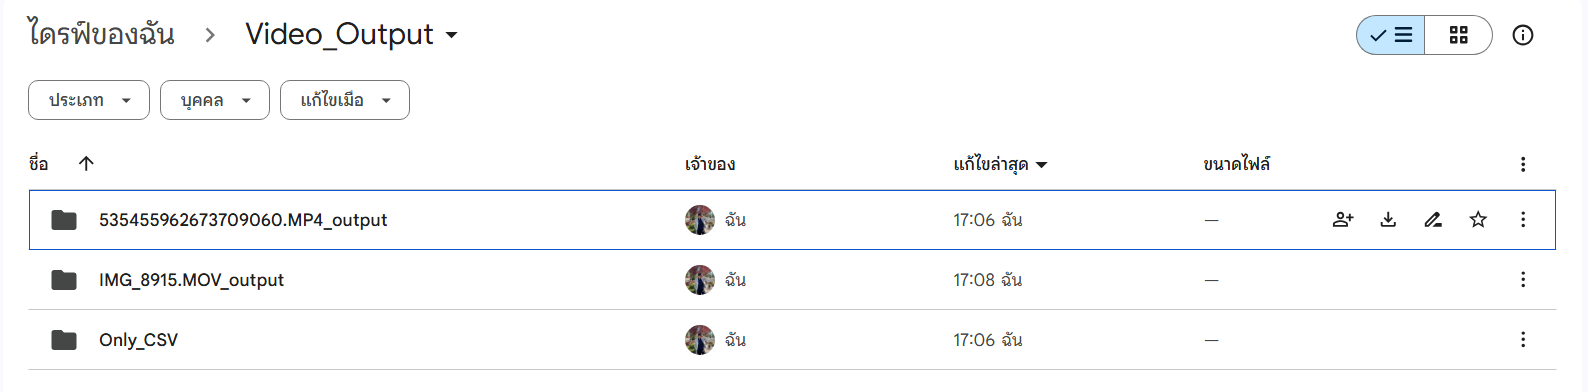

ตัวอย่างข้อมูลในไฟล์ Only_CSV ซึ่งทางคุณหมอสามารถแชร์ไฟล์นี้ได้เลย

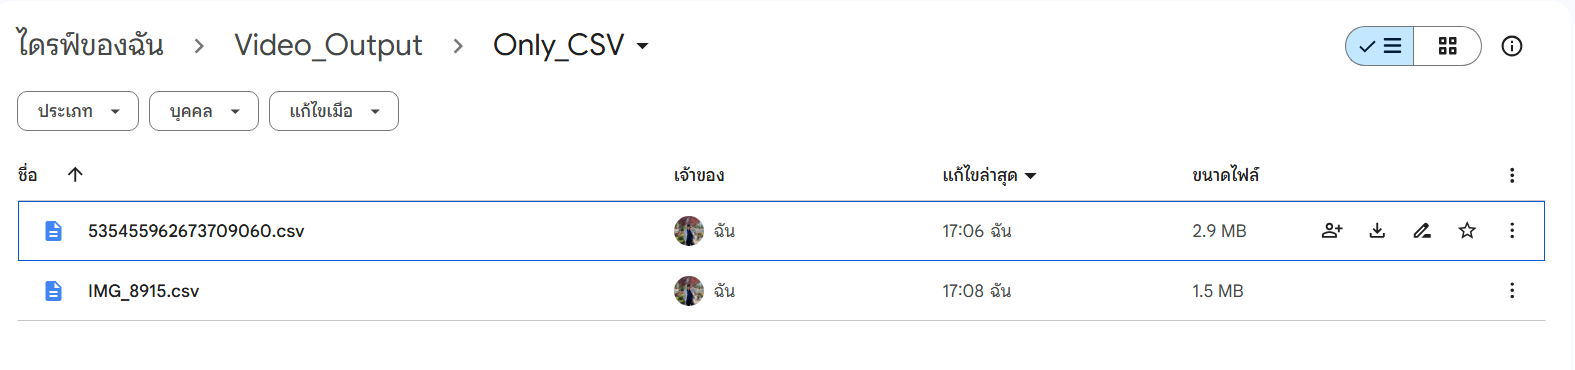

---